In [1]:
from pathlib import Path
import os
from visualisation.metric_extraction_tools import plot_all_experiments_in_folder, \
    get_all_experiments_in_folder
from visualisation.metric_extraction_tools import get_default_plot
import matplotlib.pyplot as plt

os.environ["DEBUG"] = str(False)
content_root = Path(os.getcwd()).parent
checkpoints_dir = content_root / "checkpoints"
%load_ext autoreload
%autoreload 2

In [2]:
#mn = metric_name
mn_agg_acc = "accuracy"
#centralised
mn_c_acc = "accuracy"
mn_c_mcc = "MatthewsCorrelationCoefficient"
mn_c_macro_f1 = "macro_f1_score"
mn_c_micro_f1 = "micro_f1_score"

In [3]:
import itertools


def two_plots():
    return plt.subplots(1, 2, figsize=(12,8))

def four_plots(figsize=(12, 12)):
    fig, ax = plt.subplots(2, 2, figsize=figsize)
    return fig, list(itertools.chain.from_iterable(ax))

## Hyperparamter Selection

### Femnist

In [18]:
femnist_fedavg = "Femnist_Fedavg"
femnist_fedadagrad = "Femnist_Fedadagrad"
femnist_fedadam = "Femnist_Fedadam"
femnist_fedyogi = "Femnist_Fedyogi"

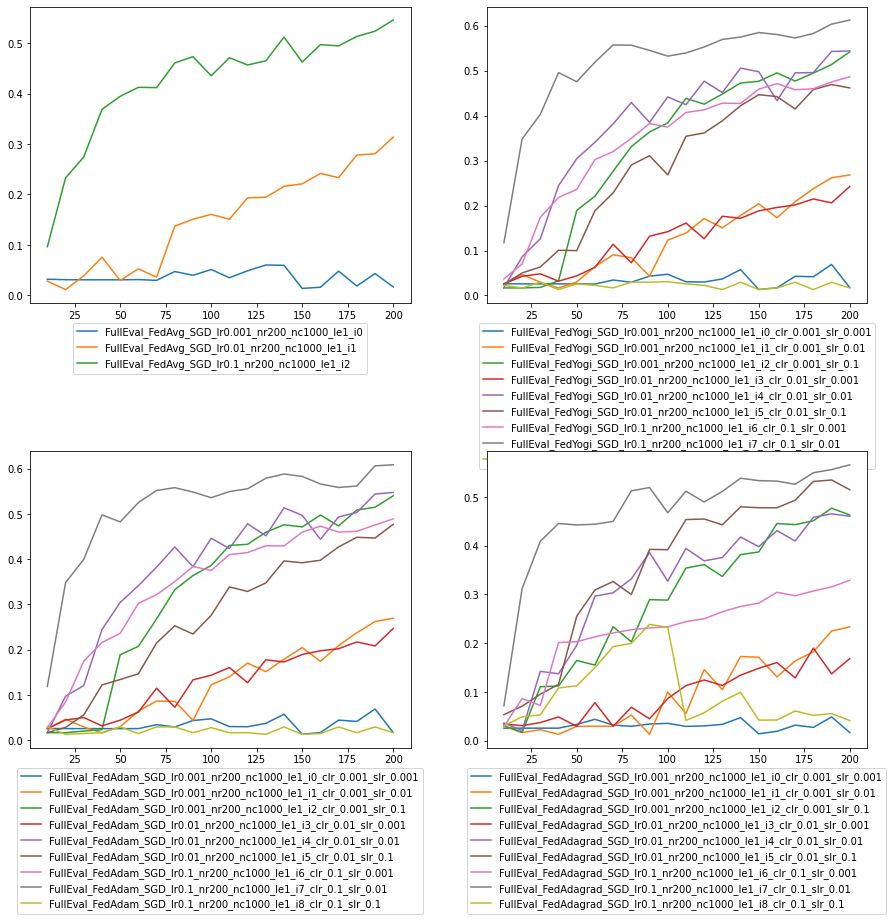

In [19]:
fig, ax = four_plots((15, 15))
plot_all_experiments_in_folder(checkpoints_dir/femnist_fedavg, ax=ax[0])
plot_all_experiments_in_folder(checkpoints_dir/femnist_fedadagrad, ax=ax[3])
plot_all_experiments_in_folder(checkpoints_dir/femnist_fedadam, ax=ax[2])
plot_all_experiments_in_folder(checkpoints_dir/femnist_fedyogi, ax=ax[1])

### Celeba

In [15]:
celeba_fedavg = "Celeba_Fedavg"
celeba_fedadagrad = "Celeba_Fedadagrad"
celeba_fedadam = "Celeba_Fedadam"
celeba_fedyogi = "Celeba_Fedyogi"

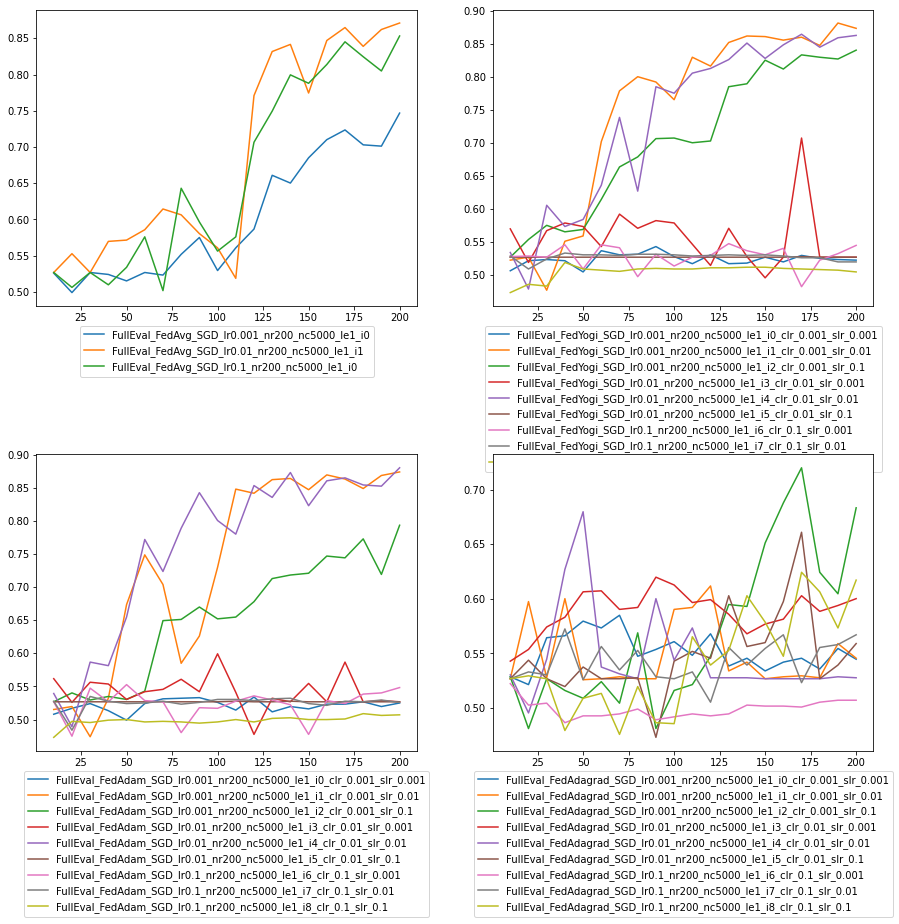

In [16]:
fig, ax = four_plots((15, 15))
plot_all_experiments_in_folder(checkpoints_dir/celeba_fedavg, ax=ax[0])
plot_all_experiments_in_folder(checkpoints_dir/celeba_fedadagrad, ax=ax[3])
plot_all_experiments_in_folder(checkpoints_dir/celeba_fedadam, ax=ax[2])
plot_all_experiments_in_folder(checkpoints_dir/celeba_fedyogi, ax=ax[1])

## Systematic Experiments - Varying Local Epochs

In [19]:
femnist_vle = "Femnist_Varying_Local_Epochs"
celeba_vle = "Celeba_Varying_Local_Epochs"

### Femnist

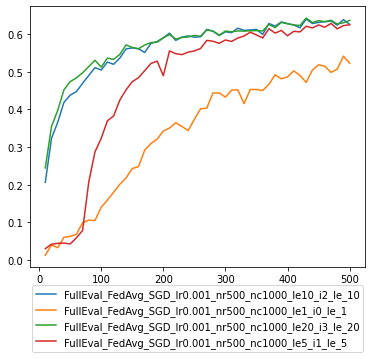

In [20]:
plot_all_experiments_in_folder(checkpoints_dir/femnist_vle)

### Celeba

In [66]:
#plot_all_experiments_in_folder(checkpoints_dir/celeba_vle)

## Systematic Experiments - Varying Reporting Fraction

In [23]:
femnist_vcpr = "Cifar10_Lda_0.001_Varying_Cohort_Size"
celeba_vcpr = "Celeba_Varying_Clients_Per_Round"

### Femnist

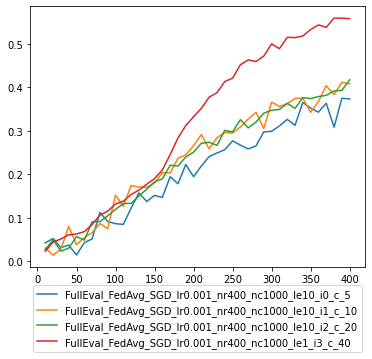

In [24]:
plot_all_experiments_in_folder(checkpoints_dir/femnist_vcpr)

### Celeba

## Varying Optimisers

In [45]:
vo_celeba =  "Celeba_Varying_Optimisers"
vo_femnist =  "Femnist_Varying_Optimisers"

def get_end_of_identifier(filename: str):
    return filename.split("_")[-1]

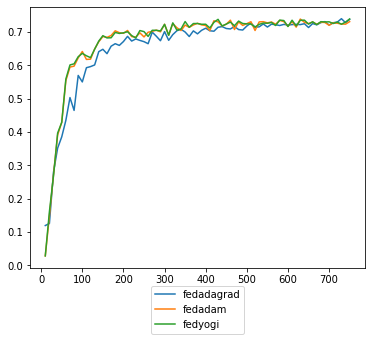

In [49]:
plot_all_experiments_in_folder(checkpoints_dir/vo_femnist, gen_name_from_subfolder_name=get_end_of_identifier)

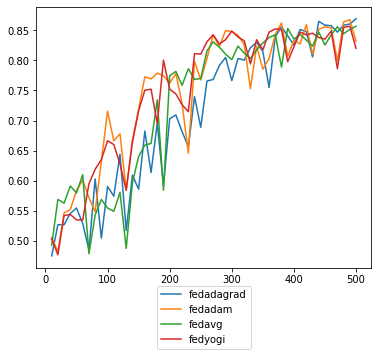

In [48]:
plot_all_experiments_in_folder(checkpoints_dir/vo_celeba, gen_name_from_subfolder_name=get_end_of_identifier)

In [55]:
def plot_against_vo(dir, ax):
    ax.set_xlim(0, 500)
    plot_all_experiments_in_folder(checkpoints_dir/dir,
                               gen_name_from_subfolder_name=get_end_of_identifier, ax=ax)

## FedProx

In [44]:
fed_prox_celeba =  "Celeba_FedProx"
fed_prox_femnist =  "Femnist_FedProx"

### Femnist

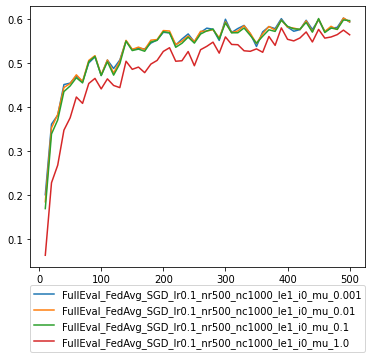

In [46]:
plot_all_experiments_in_folder(checkpoints_dir/fed_prox_femnist)

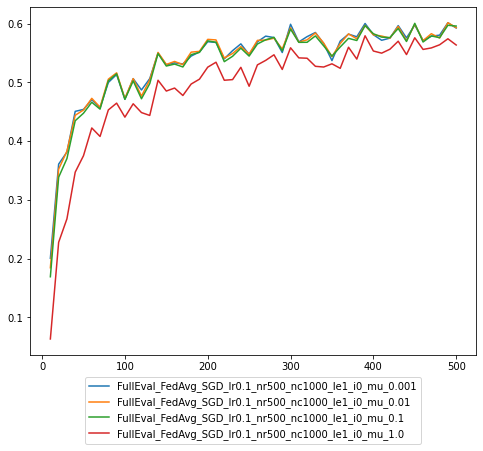

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
#plot_against_vo(vo_femnist, ax)
plot_all_experiments_in_folder(checkpoints_dir/fed_prox_femnist, ax=ax)

### Celeba

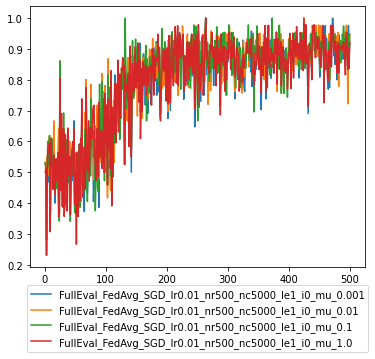

In [52]:
from visualisation.metric_extraction_tools import EvaluationType

plot_all_experiments_in_folder(checkpoints_dir/fed_prox_celeba, evaluation_type=EvaluationType.AGGREGATED)


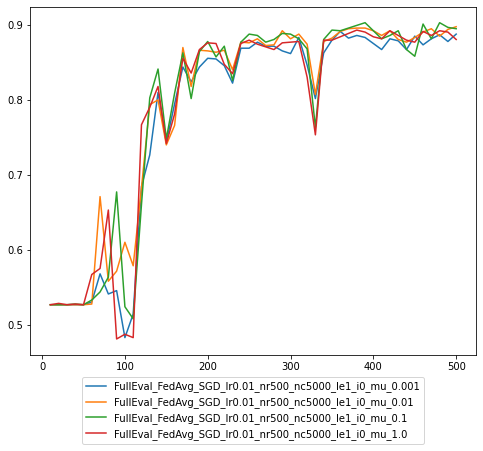

In [49]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
#plot_against_vo(vo_celeba, ax)
plot_all_experiments_in_folder(checkpoints_dir/fed_prox_celeba, ax=ax)

## Shared Global Dataset

In [75]:
sgd_celeba =  "Celeba_SharedGlobalDataset"
sgd_femnist =  "Femnist_SharedGlobalDataset"

### Femnist

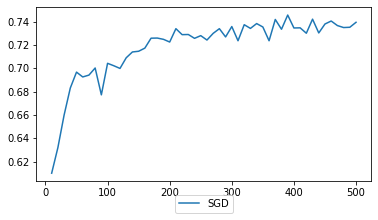

In [76]:
fig, ax =  plt.subplots(1,1)
plot_all_experiments_in_folder(checkpoints_dir/sgd_femnist, ax=ax,
                               gen_name_from_subfolder_name=lambda s: "SGD")

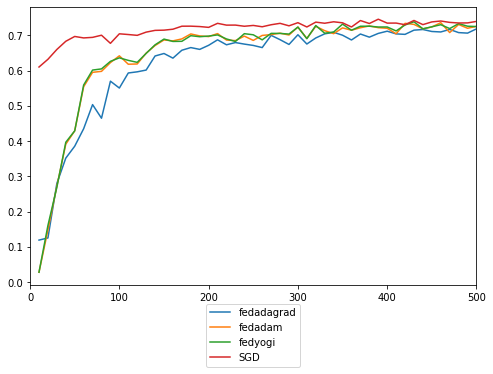

In [77]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
plot_against_vo(vo_femnist, ax)
plot_all_experiments_in_folder(checkpoints_dir/sgd_femnist, gen_name_from_subfolder_name=lambda
    s: "SGD", ax=ax)

### Celeba

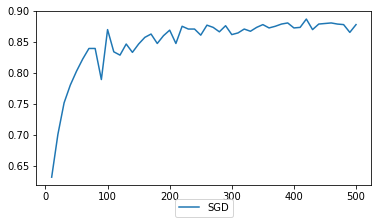

In [78]:
fig, ax =  plt.subplots(1,1)
plot_all_experiments_in_folder(checkpoints_dir/sgd_celeba, gen_name_from_subfolder_name=lambda s:
"SGD", ax=ax)

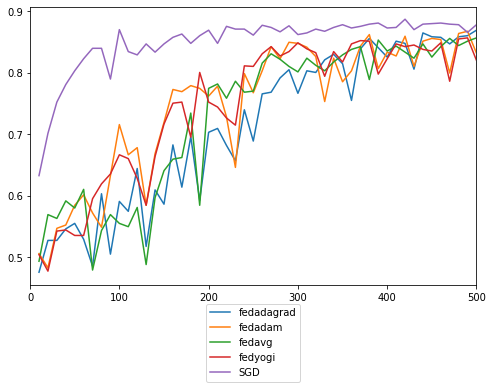

In [79]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
plot_against_vo(vo_celeba, ax)
plot_all_experiments_in_folder(checkpoints_dir/sgd_celeba, gen_name_from_subfolder_name=lambda s:
"SGD", ax=ax)